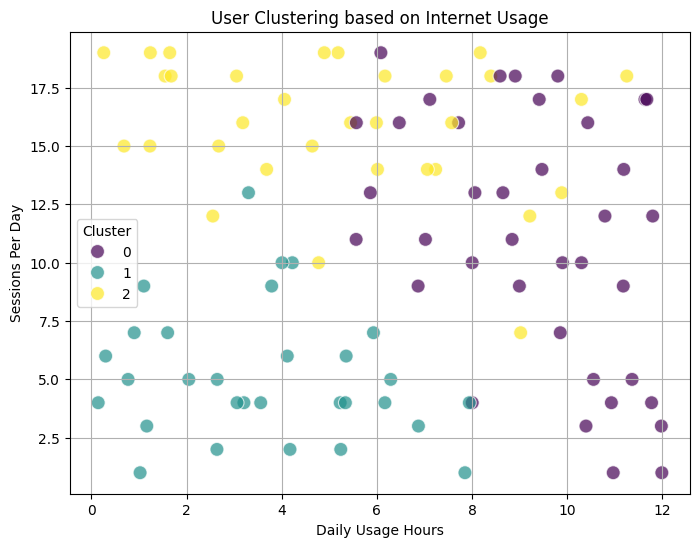

Cluster Centers (Original Scale):
   daily_usage_hours  site_categories_visited  sessions_per_day
0           9.307566                 6.631579         11.131579
1           3.666101                 5.166667          5.200000
2           5.192716                 3.218750         15.875000


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('internet_usage.csv')

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster label to dataframe
df['Cluster'] = clusters

# 2D scatter plot: usage hours vs sessions per day
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='daily_usage_hours',
    y='sessions_per_day',
    hue='Cluster',
    palette='viridis',
    data=df,
    s=100,
    alpha=0.7
)
plt.title('User Clustering based on Internet Usage')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Sessions Per Day')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optional: Show cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print("Cluster Centers (Original Scale):")
print(cluster_centers_df)
